# Research Open Payments 2018-2022 Exploration

In [1]:
# Import statements for all of the packages needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os

import textwrap
%matplotlib inline



In [2]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# Settings 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Introduction
 
The purpose of this notebook is to do a simple exploration of payments made for RESEARCH purposes in the open payments data available for the following years: 2018-2022.  
    * In March of 2020 the Covid pandemic hit in full force.  These years include the "pandemic" years when things changed dramatically in the US.
The data can be found here: 
* [Download link for Open Payments data](https://www.cms.gov/OpenPayments/Data/Dataset-Downloads)
    * Related Data:
        * [2022 Reporting Cycle Teaching Hospital List - CMS](https://www.cms.gov/files/document/2022-reporting-cycle-teaching-hospital-list.xlsx) (for simplicity this file was imported into google sheets and exported to csv for use in this notebook.)
        * [Annual Population Estimates, Estimated Components of Resident Population Change, and Rates of the Components of Resident Population Change for the United States, States, District of Columbia, and Puerto Rico: April 1, 2020 to July 1, 2022 NST-EST2022-ALLDATA](https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/state/totals/NST-EST2022-ALLDATA.csv) - [base page where the link can be found](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html)
        * [State Abbreviations](https://docs.google.com/spreadsheets/d/1l-stfzzIKQyAUi-M6Kn9jGr94w2cgPwhWnfx0qq6LTg/edit#gid=0) - [from postal website](https://about.usps.com/who/profile/history/state-abbreviations.htm)
* [Open Payments sample rows in a Google Sheet](https://docs.google.com/spreadsheets/d/1kWtff3XhCH1Hb_Q8NL4NvdywIfx31LLD4TEEoi9wBko/edit#gid=1937934411)
   
A short video on CMS (Centers for Medicare & Medicaid Services) and the data it collects:  
* [Open Payments Program Overview Video](https://www.youtube.com/watch?v=3zvuvh6iHFQ)

Notes:  
* This notebook does not explore general payments (example: food and lodging, consulting, etc.) or other payments outside of research payments.
* The open payments data is created from submissions from the reporting parties and is not necessarily cleaned for consistency, but rather taken directly from the submission content (see the video above for details)
* To learn more about about Open Payments and the laws for reporting: [Click here](https://www.cms.gov/openpayments/law-and-policy)
* Although there is data for Puerto Rico and Guam, that data is not being included in this analysis.


        


    


# Importing the data to be used in the notebook

* This notebook requires the files to be downloaded locally before import. Expected files:
    * ./open_payments_source_data/population_data/NST-EST2022-ALLDATA.csv
    * ./open_payments_source_data/teaching_hospital_info/2022 Reporting Cycle Teaching Hospital List October 2021 Posting.csv
    * ./open_payments_source_data/state_abbreviations/State Abbreviations.csv
    * ./open_payments_source_data/2022/PGYR22_P063023/OP_DTL_RSRCH_PGYR2022_P06302023.csv
    * ./open_payments_source_data/2021/PGYR21_P063023/OP_DTL_RSRCH_PGYR2021_P06302023.csv
    * ./open_payments_source_data/2020/PGYR20_P063023/OP_DTL_RSRCH_PGYR2020_P06302023.csv
    * ./open_payments_source_data/2019/PGYR19_P063023/OP_DTL_RSRCH_PGYR2019_P06302023.csv
    * ./open_payments_source_data/2018/PGYR18_P063023/OP_DTL_RSRCH_PGYR2018_P06302023.csv

##  State Data|
* This data will be used later in the notebook

In [4]:
state_population_date_location = "./open_payments_source_data/population_data/NST-EST2022-ALLDATA.csv"
state_population_date_location_desired_columns = ["NAME","POPESTIMATE2022"]

In [5]:
# Reading in population data

population_data = pd.read_csv(state_population_date_location,usecols = state_population_date_location_desired_columns)
print("Sample of state population data imported")
population_data.tail(5)

Sample of state population data imported


,NAME,POPESTIMATE2022
61,Washington,7785786
62,West Virginia,1775156
63,Wisconsin,5892539
64,Wyoming,581381
65,Puerto Rico,3221789


In [6]:
state_abbreviations_file_location = "./open_payments_source_data/state_abbreviations/State Abbreviations.csv"

# Reading in state abbreviation data
state_abbr = pd.read_csv(state_abbreviations_file_location)
print("Sample of state abbrevation data imported")
state_abbr.head()

Sample of state abbrevation data imported


,State,State Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


## Teaching Hospital Information file

In [7]:
# Setting up the file name for the teaching hospital information

th_info_location = "./open_payments_source_data/teaching_hospital_info/2022 Reporting Cycle Teaching Hospital List October 2021 Posting.csv" # teaching hospital info
print(f"Expected location for the teaching hospital information : ")
print(f"{th_info_location}")

Expected location for the teaching hospital information : 
./open_payments_source_data/teaching_hospital_info/2022 Reporting Cycle Teaching Hospital List October 2021 Posting.csv


## Open Payments Research files

In [8]:
# Setting up the file names for the research files

years = [2022,2021,2020,2019,2018] #This allows this to be expanded to read more data
# years = [2022,2021] # to make it easier to test


research_data_files = {}

for y in years:
    research_data_files[y] = f"./open_payments_source_data/{y}/PGYR{y-2000}_P063023/OP_DTL_RSRCH_PGYR{y}_P06302023.csv"

In [9]:
for y in years:
    print(f"Location of year {y} : {research_data_files[y]}")

Location of year 2022 : ./open_payments_source_data/2022/PGYR22_P063023/OP_DTL_RSRCH_PGYR2022_P06302023.csv
Location of year 2021 : ./open_payments_source_data/2021/PGYR21_P063023/OP_DTL_RSRCH_PGYR2021_P06302023.csv
Location of year 2020 : ./open_payments_source_data/2020/PGYR20_P063023/OP_DTL_RSRCH_PGYR2020_P06302023.csv
Location of year 2019 : ./open_payments_source_data/2019/PGYR19_P063023/OP_DTL_RSRCH_PGYR2019_P06302023.csv
Location of year 2018 : ./open_payments_source_data/2018/PGYR18_P063023/OP_DTL_RSRCH_PGYR2018_P06302023.csv


### Opening sample data of resarch files and checking all schemas match

In [10]:
sample_data = {}

for y in years:
    sample_data[y] = pd.read_csv(research_data_files[y],nrows=20)

In [11]:
data_columns = {}

for y in years:
    data_columns[y] = sample_data[y].columns

no_match = 0
for y in years:
    if y != max(years):
        assert len(data_columns[y]) == len(data_columns[y+1])
        compare_columns = data_columns[y] == data_columns[y+1]
        if False in compare_columns:
            no_match = no_match+1
            print("The following years do not match:")
            print(f"Year 1: {y}")
            print(f"Year 2: {y+1}")
if no_match != 0:
    print("There is a problem, some of the schemas don't match")
else: 
    print("The schemas for all the years match.")
        

The schemas for all the years match.


In [12]:
# show format of original data with a few values
print("Example data from original Open Payments Data:")
print("Note:  When importing fill data not all the columns will be included,")
print("       So this can be used as reference later if more data is to be included")
sample_data[max(years)].head()

Example data from original Open Payments Data:
Note:  When importing fill data not all the columns will be included,
       So this can be used as reference later if more data is to be included


,Change_Type,Covered_Recipient_Type,Noncovered_Recipient_Entity_Name,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Covered_Recipient_Profile_ID,Covered_Recipient_NPI,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,Covered_Recipient_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Covered_Recipient_Primary_Type_1,Covered_Recipient_Primary_Type_2,Covered_Recipient_Primary_Type_3,Covered_Recipient_Primary_Type_4,Covered_Recipient_Primary_Type_5,Covered_Recipient_Primary_Type_6,Covered_Recipient_Specialty_1,Covered_Recipient_Specialty_2,Covered_Recipient_Specialty_3,Covered_Recipient_Specialty_4,Covered_Recipient_Specialty_5,Covered_Recipient_Specialty_6,Covered_Recipient_License_State_code1,Covered_Recipient_License_State_code2,Covered_Recipient_License_State_code3,Covered_Recipient_License_State_code4,Covered_Recipient_License_State_code5,Principal_Investigator_1_Covered_Recipient_Type,Principal_Investigator_1_Profile_ID,Principal_Investigator_1_NPI,Principal_Investigator_1_First_Name,Principal_Investigator_1_Middle_Name,Principal_Investigator_1_Last_Name,Principal_Investigator_1_Name_Suffix,Principal_Investigator_1_Business_Street_Address_Line1,Principal_Investigator_1_Business_Street_Address_Line2,Principal_Investigator_1_City,Principal_Investigator_1_State,Principal_Investigator_1_Zip_Code,Principal_Investigator_1_Country,Principal_Investigator_1_Province,Principal_Investigator_1_Postal_Code,Principal_Investigator_1_Primary_Type_1,Principal_Investigator_1_Primary_Type_2,Principal_Investigator_1_Primary_Type_3,Principal_Investigator_1_Primary_Type_4,Principal_Investigator_1_Primary_Type_5,Principal_Investigator_1_Primary_Type_6,Principal_Investigator_1_Specialty_1,Principal_Investigator_1_Specialty_2,Principal_Investigator_1_Specialty_3,Principal_Investigator_1_Specialty_4,Principal_Investigator_1_Specialty_5,Principal_Investigator_1_Specialty_6,Principal_Investigator_1_License_State_code1,Principal_Investigator_1_License_State_code2,Principal_Investigator_1_License_State_code3,Principal_Investigator_1_License_State_code4,Principal_Investigator_1_License_State_code5,Principal_Investigator_2_Covered_Recipient_Type,Principal_Investigator_2_Profile_ID,Principal_Investigator_2_NPI,Principal_Investigator_2_First_Name,Principal_Investigator_2_Middle_Name,Principal_Investigator_2_Last_Name,Principal_Investigator_2_Name_Suffix,Principal_Investigator_2_Business_Street_Address_Line1,Principal_Investigator_2_Business_Street_Address_Line2,Principal_Investigator_2_City,Principal_Investigator_2_State,Principal_Investigator_2_Zip_Code,Principal_Investigator_2_Country,Principal_Investigator_2_Province,Principal_Investigator_2_Postal_Code,Principal_Investigator_2_Primary_Type_1,Principal_Investigator_2_Primary_Type_2,Principal_Investigator_2_Primary_Type_3,Principal_Investigator_2_Primary_Type_4,Principal_Investigator_2_Primary_Type_5,Principal_Investigator_2_Primary_Type_6,Principal_Investigator_2_Specialty_1,Principal_Investigator_2_Specialty_2,Principal_Investigator_2_Specialty_3,Principal_Investigator_2_Specialty_4,Principal_Investigator_2_Specialty_5,Principal_Investigator_2_Specialty_6,Principal_Investigator_2_License_State_code1,Principal_Investigator_2_License_State_code2,Principal_Investigator_2_License_State_code3,Principal_Investigator_2_License_State_code4,Principal_Investigator_2_License_State_code5,Principal_Investigator_3_Covered_Recipient_Type,Principal_Investigator_3_Profile_ID,Principal_Investigator_3_NPI,Principal_Investigator_3_First_Name,Principal_Investigator_3_Middle_Name,Principal_Investigator_3_Last_Name,Principal_Investigator_3_Name_Suffix,Principal_Investigator_3_Business_Street_Address_Line1,Principal_Investigator_3_Business_Street_Address_Line2,Principal_Investigator_3_City,Principal_Investig

In [13]:
# Setting up desired columns and name changes for research files.  See Acronyms as key

desired_columns = [
    "Teaching_Hospital_CCN",
    "Recipient_State",
    "Recipient_Zip_Code",
    "Covered_Recipient_Specialty_1",
    "Principal_Investigator_1_Profile_ID",
    "Principal_Investigator_1_NPI",
    "Principal_Investigator_1_First_Name",
    "Principal_Investigator_1_Middle_Name",
    "Principal_Investigator_1_Last_Name",
    "Principal_Investigator_1_City",
    "Principal_Investigator_1_State",
    "Principal_Investigator_1_Zip_Code",
    "Principal_Investigator_1_Primary_Type_1",
    "Principal_Investigator_1_Specialty_1",
    "Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country",
    "Related_Product_Indicator",
    "Covered_or_Noncovered_Indicator_1",
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Associated_Device_or_Medical_Supply_PDI_1",
    "Total_Amount_of_Payment_USDollars",
    "Date_of_Payment",
    "Name_of_Study",
    "Record_ID",
    "ClinicalTrials_Gov_Identifier",
]

desired_columns_types = {
    'Teaching_Hospital_CCN': 'int64',
    'Recipient_State': 'string',
    'Recipient_Zip_Code': 'string',
    'Covered_Recipient_Specialty_1': 'string',
    'Principal_Investigator_1_Profile_ID': 'int64',
    'Principal_Investigator_1_NPI': 'int64',
    'Principal_Investigator_1_First_Name': 'string',
    'Principal_Investigator_1_Middle_Name': 'string',
    'Principal_Investigator_1_Last_Name': 'string',
    'Principal_Investigator_1_City': 'string',
    'Principal_Investigator_1_State': 'string',
    'Principal_Investigator_1_Zip_Code': 'string',
    'Principal_Investigator_1_Primary_Type_1': 'string',
    'Principal_Investigator_1_Specialty_1': 'string',
    'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name': 'string',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID': 'int64',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name': 'string',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State': 'string',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country': 'string',
    'Related_Product_Indicator': 'string',
    'Covered_or_Noncovered_Indicator_1': 'string',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1': 'string',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1': 'string',
    'Associated_Device_or_Medical_Supply_PDI_1': 'string',
    'Total_Amount_of_Payment_USDollars': 'float64',
    'Date_of_Payment': 'datetime64',
    'Name_of_Study': 'string',
    'Record_ID': 'int64',
    'ClinicalTrials_Gov_Identifier': 'string'
}

# getting the number columns
number_columns = []

for d in desired_columns_types:
    if desired_columns_types[d] == 'int64' or desired_columns_types[d] == 'float64':
        number_columns.append(d)


desired_columns_new_names = [
    "Teaching_Hospital_CCN",
    "Recipient_State",
    "Recipient_Zip_Code",
    "CR_Specialty_1",
    "PI_Profile_ID",
    "PI_NPI",
    "PI_First_Name",
    "PI_Middle_Name",
    "PI_Last_Name",
    "PI_City",
    "PI_State",
    "PI_Zip_Code",
    "PI_Primary_Type_1",
    "PI_Specialty_1",
    "SAM_Name",
    "AM_Payment_ID",
    "AM_Name",
    "AM_State",
    "AM_Country",
    "Related_Product_Indicator",
    "Covered_or_Noncovered_Indicator_1",
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Drug_or_Device_Name",
    "Associated_Device_or_Medical_Supply_PDI_1",
    "Total_Amount_of_Payment_USDollars",
    "Date_of_Payment",
    "Name_of_Study",
    "Record_ID",
    "ClinicalTrials_Gov_Identifier",
]

name_changes = {}

for x in range (0, len(desired_columns)):
    name_changes[desired_columns[x]] = desired_columns_new_names[x]

Acronyms = {
    "CR" : "Covered Recipient",
    "PI" : "Principal_Investigator_1",
    "SAM" : "Submitting_Applicable_Manufacturer_or_Applicable_GPO",
    "AM" : "Applicable_Manufacturer_or_Applicable_GPO_Making",
    "Drug_or_Device" : "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Drug_or_Device_Name" : "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"
}


states_to_remove = ['GU','PR']

total_d = 'Total_Amount_of_Payment_USDollars'

In [14]:
# Acronoyms being used
print("The following Acronyms will be used to shorten column names:")
for a in Acronyms:
    print(f" {a} : {Acronyms[a]}")

The following Acronyms will be used to shorten column names:
 CR : Covered Recipient
 PI : Principal_Investigator_1
 SAM : Submitting_Applicable_Manufacturer_or_Applicable_GPO
 AM : Applicable_Manufacturer_or_Applicable_GPO_Making
 Drug_or_Device : Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1
 Drug_or_Device_Name : Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1


In [15]:
# Full list of name changes

print("Column names will be changed from the original Open Payments Data for readability as follows:")
for n in name_changes:
    print(f" {n} : {name_changes[n]}")

Column names will be changed from the original Open Payments Data for readability as follows:
 Teaching_Hospital_CCN : Teaching_Hospital_CCN
 Recipient_State : Recipient_State
 Recipient_Zip_Code : Recipient_Zip_Code
 Covered_Recipient_Specialty_1 : CR_Specialty_1
 Principal_Investigator_1_Profile_ID : PI_Profile_ID
 Principal_Investigator_1_NPI : PI_NPI
 Principal_Investigator_1_First_Name : PI_First_Name
 Principal_Investigator_1_Middle_Name : PI_Middle_Name
 Principal_Investigator_1_Last_Name : PI_Last_Name
 Principal_Investigator_1_City : PI_City
 Principal_Investigator_1_State : PI_State
 Principal_Investigator_1_Zip_Code : PI_Zip_Code
 Principal_Investigator_1_Primary_Type_1 : PI_Primary_Type_1
 Principal_Investigator_1_Specialty_1 : PI_Specialty_1
 Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name : SAM_Name
 Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID : AM_Payment_ID
 Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name : AM_Name
 Applicable_Man

## OP Data Ingestion

In [16]:
# Change columns in a dataframe to uppercase

def change_columns_to_upper(dataframe, columns_to_change_to_upper):
    """
    This function will: 
     * Change values of specific columns in dataframe to uppercase.

    Parameters:
        dataframe: The dataframe to modify
        columns_to_change_to_upper: The columns to change to uppercase

    Returns:
        dateframe:  The dataframe with the modified columns
    """
    for c in columns_to_change_to_upper:
        dataframe[c] = dataframe[c].str.upper()
    return dataframe


In [17]:
def update_column_types_and_case(dataframe, desired_columns_types):  
    """
    This function will: 
     * Update the types and cases of the columns.

    Parameters:
        dataframe: The dataframe to modify
        desired_columns_types: Dictionary of the changes to be made

    Returns:
        dateframe:  The dataframe with the modified columns
    """
    
    string_columns = []
    for e in desired_columns_types:
        if desired_columns_types[e] == 'float64' or desired_columns_types[e] == 'int64':
            dataframe[e]=dataframe[e].apply(pd.to_numeric)
            if  desired_columns_types[e] == 'float64':
                dataframe[e] = dataframe[e].astype('Float64')
            else:
                dataframe[e] = dataframe[e].astype('Int64')
        else:
            dataframe[e] = dataframe[e].astype('string')
            string_columns.append(e)
            
    dataframe = change_columns_to_upper(dataframe, string_columns)
    
    return dataframe

In [18]:
def get_fill_rate_df(dataframe):
    """
    This function will: 
     * Report the fillrate of a dataframe.

    Parameters:
        dataframe: The dataframe to report on

    Returns:
        fill_rate_list:  A list of the fill rates.
    """
    not_null_percent = dataframe.notnull().sum() / dataframe.shape[0]
    fill_rate_list = not_null_percent.tolist() 
    return fill_rate_list

In [19]:
states_to_remove = ['GU','PR']

def filter_data_from_guam_or_pr(dataframe, states_to_remove):
    """
    This function will: 
     * Remove data related to Guam and Puerto Rico.

    Parameters:
        dataframe: The dataframe to be modified
        states_to_remove:  The states that will be removed

    Returns:
        dataframe: The data frame minus data related to Guam and Puerto Rico.
    """
    df_columns = dataframe.columns
    state_fields = []
    for d in df_columns:
        if 'State'in d or 'state' in d:
            state_fields.append(d)
   
    for s in state_fields:
        dataframe = dataframe[~dataframe[s].isin(states_to_remove)]

    return dataframe

In [20]:
def read_in_op_file(year,csv_locations,desired_columns,desired_columns_new_names,desired_columns_types,states_to_remove=None):
    """
    This function will: 
     * Read in a csv file, change the names and types of the columns, 
       change some columns to upper case and remove data for certain locations
    Parameters:
        year: The year of the data to be read in
        csv_locations: Where the files will be found
        desired_columns: Which columns should be read in
        desired_columns_new_names: The new names of the columns
        desired_columns_types: The types for the columns
        states_to_remove:  The states that will be removed

    Returns:
        dataframe: The dataframe created based on the parameters above
    """
    # Reading in the datafile
    op_df = pd.read_csv(csv_locations[year] ,parse_dates=['Date_of_Payment'],usecols = desired_columns)
    
    op_df = update_column_types_and_case(op_df,desired_columns_types)
        
    # Renaming the columns for ease of use and display
    op_df = op_df.rename(columns=name_changes)
    
    # Adding the column with the name
    op_df['Year'] = year
    op_df['Year'] = op_df['Year'].astype('Int64')
    
    # Return fill rates
    fill_rate_list = get_fill_rate_df(op_df)
    
    # Filter out data related to Guam and Puerto Rico
    if states_to_remove:
        before = op_df.shape[0]
        op_df = filter_data_from_guam_or_pr(op_df, states_to_remove)
        after = op_df.shape[0]
        percent_preserved = round(after/before * 100,2)
        print(f"    After removing data related to - {states_to_remove}:  {percent_preserved}% of data is preserved")

    return op_df, fill_rate_list
    

In [21]:
def read_in_op_data(years,csv_locations,desired_columns,desired_columns_new_names,desired_columns_types,states_to_remove):
    """
    This function will: 
        * Read in all the op data and report as each file is read in
    Parameters:
        years: The years of data to be read in
        csv_locations: Where the files will be found
        desired_columns: Which columns should be read in
        desired_columns_new_names: The new names of the columns
        desired_columns_types: The types for the columns
        states_to_remove:  The states that will be removed

    Returns:
        dataframe: A dataframe spanning data from all years
    """
    counter = 0
    
    for y in years:
        
        print(f"Reading in year: {y}")
        # read in the data
        op_df, fill_rate_list = read_in_op_file(y,research_data_files,desired_columns,desired_columns_new_names,desired_columns_types,states_to_remove)
        # print(fill_rate_list)
        if counter !=0:
            op_full_df = pd.concat([op_full_df,op_df])
            
        else:
            op_full_df = op_df
            fill_rate_df = pd.DataFrame()
            fill_rate_df['columns'] = op_df.columns
            
            counter=+1
         
        fill_rate_df[f"fill_rate_{y}"]=fill_rate_list
                     
        print(f"Finished reading in year: {y}")
        print(f"     Year count: {op_df.shape[0]}")
        print(f"     total_count count: {op_full_df.shape[0]}")
        #print(f"{fill_rate_list[0]}")
        
        
        
    print("Finished reading all files")
        
        
    return op_full_df, fill_rate_df

## Beginnning to read in the data.  This may take some time so be patient.

In [22]:
op_full_df, fill_rate_df = read_in_op_data(years,research_data_files,desired_columns,desired_columns_new_names,desired_columns_types,states_to_remove)

Reading in year: 2022


/var/folders/c2/3v58zrjs66xg9h87pdnj8j500000gn/T/ipykernel_10806/1191062798.py:18: DtypeWarning: Columns (26,208) have mixed types. Specify dtype option on import or set low_memory=False.
  op_df = pd.read_csv(csv_locations[year] ,parse_dates=['Date_of_Payment'],usecols = desired_columns)


    After removing data related to - ['GU', 'PR']:  99.47% of data is preserved
Finished reading in year: 2022
     Year count: 948267
     total_count count: 948267
Reading in year: 2021


/var/folders/c2/3v58zrjs66xg9h87pdnj8j500000gn/T/ipykernel_10806/1191062798.py:18: DtypeWarning: Columns (26,208) have mixed types. Specify dtype option on import or set low_memory=False.
  op_df = pd.read_csv(csv_locations[year] ,parse_dates=['Date_of_Payment'],usecols = desired_columns)


    After removing data related to - ['GU', 'PR']:  99.36% of data is preserved
Finished reading in year: 2021
     Year count: 704369
     total_count count: 1652636
Reading in year: 2020


/var/folders/c2/3v58zrjs66xg9h87pdnj8j500000gn/T/ipykernel_10806/1191062798.py:18: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  op_df = pd.read_csv(csv_locations[year] ,parse_dates=['Date_of_Payment'],usecols = desired_columns)


    After removing data related to - ['GU', 'PR']:  99.52% of data is preserved
Finished reading in year: 2020
     Year count: 666108
     total_count count: 2318744
Reading in year: 2019


/var/folders/c2/3v58zrjs66xg9h87pdnj8j500000gn/T/ipykernel_10806/1191062798.py:18: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  op_df = pd.read_csv(csv_locations[year] ,parse_dates=['Date_of_Payment'],usecols = desired_columns)


    After removing data related to - ['GU', 'PR']:  99.58% of data is preserved
Finished reading in year: 2019
     Year count: 709805
     total_count count: 3028549
Reading in year: 2018


/var/folders/c2/3v58zrjs66xg9h87pdnj8j500000gn/T/ipykernel_10806/1191062798.py:18: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  op_df = pd.read_csv(csv_locations[year] ,parse_dates=['Date_of_Payment'],usecols = desired_columns)


    After removing data related to - ['GU', 'PR']:  99.56% of data is preserved
Finished reading in year: 2018
     Year count: 790500
     total_count count: 3819049
Finished reading all files


In [23]:
# Printing sample final data to be used for study
print("Sample of Open Payments data after ingestion steps.")
print(f"Number of columns before ingestion: {len(sample_data[max(years)].columns)}")
print(f"Number of columns after ingestion:  {len(op_full_df.columns)}")

op_full_df.head()

Sample of Open Payments data after ingestion steps.
Number of columns before ingestion: 252
Number of columns after ingestion:  30


,Teaching_Hospital_CCN,Recipient_State,Recipient_Zip_Code,CR_Specialty_1,PI_Profile_ID,PI_NPI,PI_First_Name,PI_Middle_Name,PI_Last_Name,PI_City,PI_State,PI_Zip_Code,PI_Primary_Type_1,PI_Specialty_1,SAM_Name,AM_Payment_ID,AM_Name,AM_State,AM_Country,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Drug_or_Device_Name,Associated_Device_or_Medical_Supply_PDI_1,Total_Amount_of_Payment_USDollars,Date_of_Payment,Name_of_Study,Record_ID,ClinicalTrials_Gov_Identifier,Year
0,450076,TX,77030,<NA>,860254,1467538132,NEETA,<NA>,SOMAIAH,HOUSTON,TX,77030-4000,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,DECIPHERA PHARMACEUTICALS INC.,100000776815,DECIPHERA PHARMACEUTICALS INC.,MA,UNITED STATES,YES,COVERED,DRUG,QINLOCK,<NA>,1850.00,2022-03-05,INTRIGUE A STUDY OF DCC-2618 VS SUNITINIB IN A...,953473211,NCT03673501,2022
1,33302,AZ,85016,<NA>,1159072,1952315988,SANJAY,J,SHAH,PHOENIX,AZ,85003,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,PFIZER INC.,100000771818,"GLOBAL BLOOD THERAPEUTICS, INC.",CA,UNITED STATES,NO,<NA>,<NA>,<NA>,<NA>,11500.00,2022-09-01,A STUDY OF A SINGLE DOSE OF INCLACUMAB TO REDU...,914606279,<NA>,2022
2,<NA>,IA,50309,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,PFIZER INC.,100000000286,PFIZER INC.,NY,UNITED STATES,YES,COVERED,DRUG,TALZENNA,<NA>,1900.00,2022-09-25,TALAZOPARIB CLINICAL PUBLICATION PROGRAM,949754907,<NA>,2022
3,360137,OH,44106,<NA>,240207,1306820717,SANJAY,P,AHUJA,CLEVELAND,OH,44106,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|PEDIATRICS...,"GENENTECH, INC.",100000000089,"GENENTECH, INC.",CA,UNITED STATES,YES,COVERED,BIOLOGICAL,HEMLIBRA,<NA>,3300.00,2022-05-13,AN OPEN LABEL STUDY TO DETERMINE PK AND PD OF ...,950670297,<NA>,2022
4,30038,AZ,85251,<NA>,277405,1114929114,MICHAEL,S,GORDON,SCOTTSDALE,AZ,85258,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,DAIICHI SANKYO INC.,100000000195,DAIICHI SANKYO INC.,NJ,UNITED STATES,YES,COVERED,DRUG,TURALIO,<NA>,39.00,2022-04-22,PL3397-A-U4003,935025573,NCT04526704,2022


In [24]:
print("Fill rate report:")
fill_rate_df

Fill rate report:


,columns,fill_rate_2022,fill_rate_2021,fill_rate_2020,fill_rate_2019,fill_rate_2018
0,Teaching_Hospital_CCN,0.11,0.16,0.18,0.17,0.16
1,Recipient_State,1.00,1.00,1.00,1.00,1.00
2,Recipient_Zip_Code,1.00,1.00,1.00,1.00,1.00
3,CR_Specialty_1,0.02,0.03,0.04,0.06,0.05
4,PI_Profile_ID,0.97,0.96,0.95,0.94,0.95
5,PI_NPI,0.97,0.96,0.95,0.94,0.95
6,PI_First_Name,0.97,0.96,0.95,0.94,0.95
7,PI_Middle_Name,0.67,0.65,0.62,0.65,0.54
8,PI_Last_Name,0.97,0.96,0.95,0.94,0.95
9,PI_City,0.97,0.96,0.95,0.94,0.95


## Reports on all years of data included

In [25]:
print(f"Years included: {years}")

Years included: [2022, 2021, 2020, 2019, 2018]


In [26]:
def plot_payments_by_year(op_full_df):
    total_number_of_payments = op_full_df[['Record_ID','Year']].groupby('Year').count() 
    total_dollars = op_full_df[['Year','Total_Amount_of_Payment_USDollars']].groupby('Year').sum('Total_Amount_of_Payment_USDollars')
    total_number_of_payments.plot.bar(title = "Number of Records per Year", color='green')
    total_dollars.plot.bar(title = "Payments (1e9 = Billions) per Year")
    
    

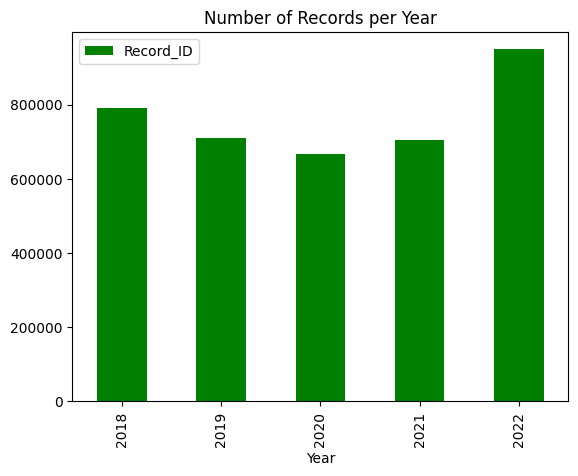

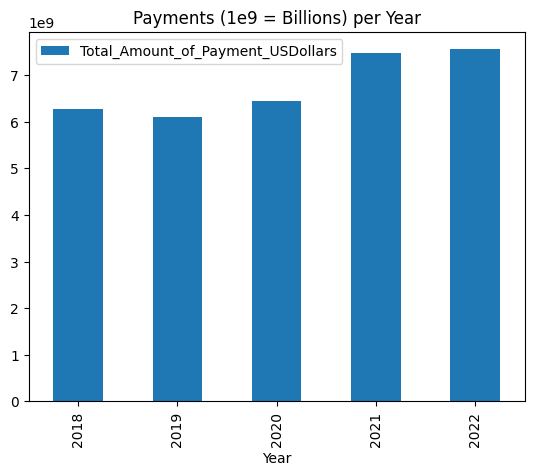

In [27]:
plot_payments_by_year(op_full_df)

# Adding in the teaching hospital data


In [28]:
print(f"Expected location of the teaching hospital data:  {th_info_location}")

Expected location of the teaching hospital data:  ./open_payments_source_data/teaching_hospital_info/2022 Reporting Cycle Teaching Hospital List October 2021 Posting.csv


In [29]:
# columns to be updated

th_desired_columns = ['CCN','Hospital Name','City','State','Zip Code']

th_desired_column_types = {
    'CCN': 'int64',
    'Hospital Name': 'string',
    'City': 'string',
    'State': 'string',
    'Zip Code': 'string'
}


th_desired_name_changes = {
    'CCN' : 'THL_CCN',
    'Hospital Name' : 'THL_Hospital Name',
    'City' : 'THL_City',
    'State' : 'THL_State',
    'Zip Code' : 'THL_Zip Code'
}


In [30]:
def read_in_th_info(th_info_location,th_desired_columns,th_desired_name_changes,th_desired_columns_types):
    """
    This function will: 
     * Read in the teaching hospital data csv file, change the names and types of the columns, 
       change some columns to upper case
    Parameters:
        th_info_location: Location of the csv file
        th_desired_columns: Which columns should be read in
        th_desired_name_changes: The new names of the columns
        th_desired_columns_types: The types for the columns

    Returns:
        dataframe: The dataframe created based on the parameters above
    """
    
    print("Reading in Teaching Hospital Information")
    
    th_info_df = teaching_hospital_list = pd.read_csv(th_info_location,usecols = th_desired_columns)
    th_info_df = update_column_types_and_case(th_info_df, th_desired_columns_types)
    th_info_df = th_info_df.rename(columns=th_desired_name_changes )
    
    
    print(f"   File contains {th_info_df.shape[0]} rows")
    print("Finished rading in Teaching Hospital Information")

    return th_info_df

In [31]:
th_info_df = read_in_th_info(th_info_location,th_desired_columns,th_desired_name_changes,th_desired_column_types)

Reading in Teaching Hospital Information
   File contains 1384 rows
Finished rading in Teaching Hospital Information


In [32]:
print("Example Teaching hospital data after ingestion.")
th_info_df.head()

Example Teaching hospital data after ingestion.


,THL_CCN,THL_Hospital Name,THL_City,THL_State,THL_Zip Code
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,DOTHAN,AL,36301
1,10011,ST. VINCENTS EAST,BIRMINGHAM,AL,35235
2,10018,CALLAHAN EYE FOUNDATION HOSP,BIRMINGHAM,AL,35233
3,10023,BAPTIST MEDICAL CENTER SOUTH,MONTGOMERY,AL,36116
4,10033,UNIVERSITY OF ALABAMA HOSPITAL,BIRMINGHAM,AL,35233


In [33]:
# merging the teaching hospital information into the datafrae

op_full_df = pd.merge(op_full_df, th_info_df,left_on='Teaching_Hospital_CCN', right_on='THL_CCN', how='left')

In [34]:
print("Example data after op data and teaching hospital data have been merged.")

op_full_df.head()

Example data after op data and teaching hospital data have been merged.


,Teaching_Hospital_CCN,Recipient_State,Recipient_Zip_Code,CR_Specialty_1,PI_Profile_ID,PI_NPI,PI_First_Name,PI_Middle_Name,PI_Last_Name,PI_City,PI_State,PI_Zip_Code,PI_Primary_Type_1,PI_Specialty_1,SAM_Name,AM_Payment_ID,AM_Name,AM_State,AM_Country,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Drug_or_Device_Name,Associated_Device_or_Medical_Supply_PDI_1,Total_Amount_of_Payment_USDollars,Date_of_Payment,Name_of_Study,Record_ID,ClinicalTrials_Gov_Identifier,Year,THL_CCN,THL_Hospital Name,THL_City,THL_State,THL_Zip Code
0,450076,TX,77030,<NA>,860254,1467538132,NEETA,<NA>,SOMAIAH,HOUSTON,TX,77030-4000,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,DECIPHERA PHARMACEUTICALS INC.,100000776815,DECIPHERA PHARMACEUTICALS INC.,MA,UNITED STATES,YES,COVERED,DRUG,QINLOCK,<NA>,1850.00,2022-03-05,INTRIGUE A STUDY OF DCC-2618 VS SUNITINIB IN A...,953473211,NCT03673501,2022,450076,UT MD ANDERSON CANCER CENTER,HOUSTON,TX,77030
1,33302,AZ,85016,<NA>,1159072,1952315988,SANJAY,J,SHAH,PHOENIX,AZ,85003,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,PFIZER INC.,100000771818,"GLOBAL BLOOD THERAPEUTICS, INC.",CA,UNITED STATES,NO,<NA>,<NA>,<NA>,<NA>,11500.00,2022-09-01,A STUDY OF A SINGLE DOSE OF INCLACUMAB TO REDU...,914606279,<NA>,2022,33302,PHOENIX CHILDRENS HOSPITAL,PHOENIX,AZ,85016
2,<NA>,IA,50309,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,PFIZER INC.,100000000286,PFIZER INC.,NY,UNITED STATES,YES,COVERED,DRUG,TALZENNA,<NA>,1900.00,2022-09-25,TALAZOPARIB CLINICAL PUBLICATION PROGRAM,949754907,<NA>,2022,<NA>,<NA>,<NA>,<NA>,<NA>
3,360137,OH,44106,<NA>,240207,1306820717,SANJAY,P,AHUJA,CLEVELAND,OH,44106,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|PEDIATRICS...,"GENENTECH, INC.",100000000089,"GENENTECH, INC.",CA,UNITED STATES,YES,COVERED,BIOLOGICAL,HEMLIBRA,<NA>,3300.00,2022-05-13,AN OPEN LABEL STUDY TO DETERMINE PK AND PD OF ...,950670297,<NA>,2022,360137,UH CLEVELAND MEDICAL CENTER,CLEVELAND,OH,44106
4,30038,AZ,85251,<NA>,277405,1114929114,MICHAEL,S,GORDON,SCOTTSDALE,AZ,85258,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,DAIICHI SANKYO INC.,100000000195,DAIICHI SANKYO INC.,NJ,UNITED STATES,YES,COVERED,DRUG,TURALIO,<NA>,39.00,2022-04-22,PL3397-A-U4003,935025573,NCT04526704,2022,30038,HONORHEALTH SCOTTSDALE OSBORN MED CT,SCOTTSDALE,AZ,85251


# Data Exploration

In [35]:
def create_subset_dataframe(dataframe, column, filter_column=False, aggregate=False, print_report=True):
    """
    This function will: 
     * Create a subset of the dataframe to where the values of the filter_column is not null
     * If aggregate is set to True - Aggregate 'column' by the filter_column
     * If print_report is set to True - Report basic information on the new dataframe 

    Parameters:
        dataframe:  main dataframe to create a subset of
        column:  the column to aggregate
        filter_column:  the column that contains the data to be examined
        aggregate:  Boolean to determine if data of column should be aggregated by filter_column
        print_report: Boolean to determine if basic report should be generated regarding subset of data
    Returns:
        dataframe: Subset dataframe 
    """
    
    old_count = dataframe.shape[0]
    
    # If there's a filter_column filtering down to just the rows where that column is not null
    if filter_column:
        dataframe = dataframe[dataframe[filter_column].notnull()]
        new_count = dataframe.shape[0]
        percent_included = round((new_count/old_count)*100,2)
    else:
        new_count = old_count
        percent_included = 100

    # If aggregate column then show statistics per unique value in column
    
    if aggregate:
        dataframe = dataframe.groupby(filter_column, as_index = False)[column].sum()
        
    return dataframe, old_count, new_count, percent_included
    

In [36]:
def basic_stats(dataframe, column, filter_column=False, aggregate=False):
    """
    This function will: 
     * Create a subset of the dataframe 
     * Display sample data
     * Report on the subset of data
     
    Parameters:
        dataframe:  main dataframe to create a subset of
        column:  the column to aggregate
        filter_column:  the column that contains the data to be examined
        aggregate:  Boolean to determine if data of column should be aggregated by filter_column
        print_report: Boolean to determine if basic report should be generated regarding subset of data
    Returns:
        dataframe: basic stats dataframe
    """
    
    dataframe, old_count, new_count, percent_included = create_subset_dataframe(dataframe, column, filter_column, aggregate)
    
    dataframe = dataframe.sort_values(by=[total_d],ascending=False)
    
    # may want to updated to format more like: grouped_single = df.groupby('Team').agg({'Age': ['mean', 'min', 'max']})

    
    basic_stats_to_gather = ['Old Count','New Count', 'Percentage Included','Total','Mean','Median','Maximum','Minimum']
    basic_states_gathered = []
    basic_states_gathered.append(old_count)
    basic_states_gathered.append(new_count)
    basic_states_gathered.append(percent_included)
    basic_states_gathered.append(dataframe[column].sum())
    basic_states_gathered.append(dataframe[column].mean())
    basic_states_gathered.append(dataframe[column].median())
    basic_states_gathered.append(dataframe[column].max())
    basic_states_gathered.append(dataframe[column].min())
    basic_stats_df = pd.DataFrame()
    basic_stats_df['Basic Stats'] = basic_stats_to_gather 
    basic_stats_df['Values'] = basic_states_gathered


    return basic_stats_df

In [37]:
def basic_stats_for_all_years(dataframe, total_d,years, filter_column=False, aggregate=False):
    """
    This function will: 
     * Create a subset of the dataframe 
     * Display sample data
     * Report on the subset of data
     
    Parameters:
        dataframe:  Main dataframe to create a subset of
        total_d:  The column to aggregate
        years: The years of data being used
        filter_column:  the column that contains the data to be examined
        aggregate:  Boolean to determine if data of column should be aggregated by filter_column
    Returns:
        all_years_stats_df: stats for all years
    """
    
    print("Basic stats on dollar payments")
    if filter_column:
        print(f"This data will be filtered on the following column:  {filter_column}")
    if aggregate:
        print(f"This data will be aggregated on the following column:  {filter_column}")
    
    print("Note:  There are some very small payments listed of less than a dollar.")
    print("These have not been removed, but it might make sense to do so in the future.")
    basic_stats_dict = {}
    x=0
    for year in years:
        stats_list = []
        year_df = dataframe[dataframe['Year'] == year]
        year_stats_df = basic_stats(year_df, total_d,filter_column,aggregate)
        basic_stats_dict[year] = year_stats_df['Values']
        if x==0:
            all_years_stats_df = year_stats_df
            all_years_stats_df=all_years_stats_df.rename(columns={"Values": year}, errors="raise")
            x=x+1
        else:
            all_years_stats_df.insert(loc=1, column=year, value=list(year_stats_df['Values']))
            
    display(all_years_stats_df)    
    
    all_years_stats_df2 = all_years_stats_df.transpose()
    header=all_years_stats_df2.iloc[0]
    all_years_stats_df2=all_years_stats_df2[1:]
    all_years_stats_df2.columns=header
    all_years_stats_df2=all_years_stats_df2[['Median']]
    
    if not filter_column:
        filter_column = "All_records"
    
    lines = all_years_stats_df2.plot.line(title = f"Median Payments For: {filter_column} vs payments in dollars")
    return all_years_stats_df


## Overall payments in dollars for the full dataset

Basic stats on dollar payments
Note:  There are some very small payments listed of less than a dollar.
These have not been removed, but it might make sense to do so in the future.


,Basic Stats,2018,2019,2020,2021,2022
0,Old Count,790500.00,709805.00,666108.00,704369.00,948267.00
1,New Count,790500.00,709805.00,666108.00,704369.00,948267.00
2,Percentage Included,100.00,100.00,100.00,100.00,100.00
3,Total,6282030281.59,6089662444.58,6435007154.23,7479584458.93,7548472781.48
4,Mean,7946.91,8579.35,9660.61,10618.84,7960.28
5,Median,1000.00,1000.00,970.65,783.90,469.20
6,Maximum,76741350.00,29713893.14,78555524.70,54157211.51,21298847.30
7,Minimum,0.01,0.01,0.01,0.01,0.01


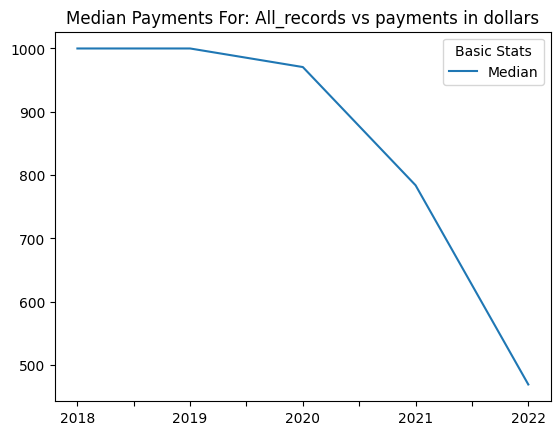

In [38]:
all_years_stats_df = basic_stats_for_all_years(op_full_df,total_d,years)

## Basic stats for  payments aggregated by principal investor 

Basic stats on dollar payments
This data will be filtered on the following column:  PI_Profile_ID
This data will be aggregated on the following column:  PI_Profile_ID
Note:  There are some very small payments listed of less than a dollar.
These have not been removed, but it might make sense to do so in the future.


,Basic Stats,2018,2019,2020,2021,2022
0,Old Count,790500.00,709805.00,666108.00,704369.00,948267.00
1,New Count,748853.00,664828.00,631667.00,676227.00,923096.00
2,Percentage Included,94.73,93.66,94.83,96.00,97.35
3,Total,5953254993.26,5758233332.18,6118062516.78,7198039730.31,7286500706.48
4,Mean,182822.68,182546.07,198027.59,236762.05,252171.68
5,Median,32855.15,32697.32,32087.85,33000.49,35500.00
6,Maximum,152828027.27,30485529.63,129602093.48,134044721.51,89478409.20
7,Minimum,0.25,0.36,0.05,0.38,0.23


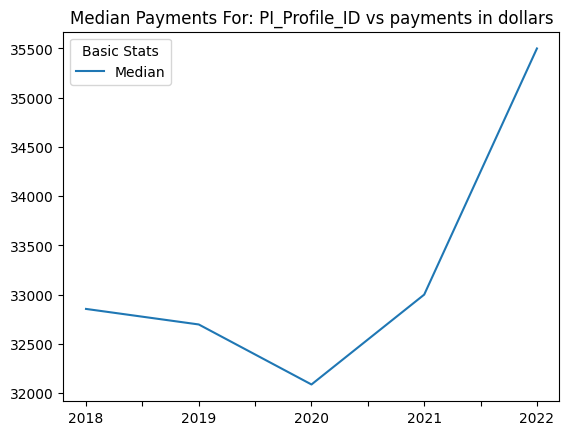

In [39]:
all_years_stats_df = basic_stats_for_all_years(op_full_df,total_d,years,'PI_Profile_ID',True)

## Basic stats for  payments aggregated by Teaching Hospital

Basic stats on dollar payments
This data will be filtered on the following column:  Teaching_Hospital_CCN
This data will be aggregated on the following column:  Teaching_Hospital_CCN
Note:  There are some very small payments listed of less than a dollar.
These have not been removed, but it might make sense to do so in the future.


,Basic Stats,2018,2019,2020,2021,2022
0,Old Count,790500.00,709805.00,666108.00,704369.00,948267.00
1,New Count,130286.00,121522.00,119093.00,111354.00,106439.00
2,Percentage Included,16.48,17.12,17.88,15.81,11.22
3,Total,1468293385.29,1569221858.84,1636256523.97,1661657413.16,1582969537.18
4,Mean,1968221.70,2056647.26,2175873.04,2209650.82,2271118.42
5,Median,151791.52,132942.88,113554.74,148721.79,136844.95
6,Maximum,193765654.44,222957313.29,208602920.60,264824664.66,283678758.87
7,Minimum,19.76,6.00,64.20,51.72,15.36


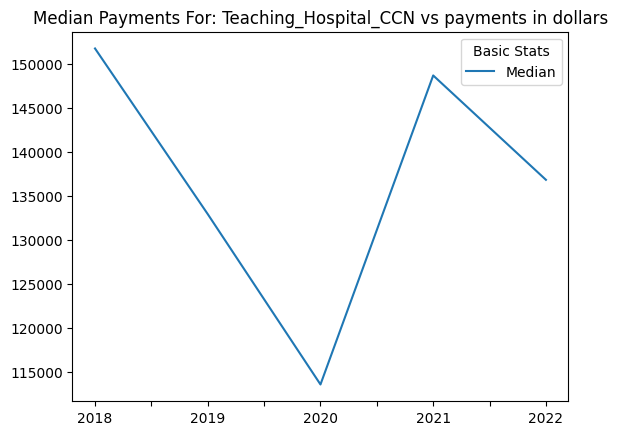

In [40]:
all_years_stats_df = basic_stats_for_all_years(op_full_df, total_d,years,'Teaching_Hospital_CCN',True)


## Basic stats for  payments aggregated by drug or device

Basic stats on dollar payments
This data will be filtered on the following column:  Drug_or_Device_Name
This data will be aggregated on the following column:  Drug_or_Device_Name
Note:  There are some very small payments listed of less than a dollar.
These have not been removed, but it might make sense to do so in the future.


,Basic Stats,2018,2019,2020,2021,2022
0,Old Count,790500.00,709805.00,666108.00,704369.00,948267.00
1,New Count,481727.00,421969.00,390912.00,426606.00,520851.00
2,Percentage Included,60.94,59.45,58.69,60.57,54.93
3,Total,4118395386.33,3909094338.33,3756176039.22,4236015870.48,4333055835.33
4,Mean,1661313.19,1643858.01,1695025.29,2025832.55,2333363.40
5,Median,105247.87,105331.73,79605.65,94756.66,108226.00
6,Maximum,297516582.17,300205746.12,308469186.79,390977929.60,392101108.91
7,Minimum,1.36,2.00,1.17,12.09,1.18


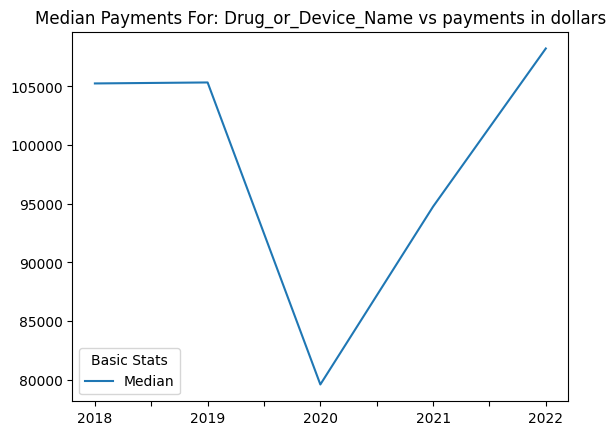

In [41]:
all_years_stats_df = basic_stats_for_all_years(op_full_df, total_d,years,'Drug_or_Device_Name',True)


# The top 5
This shows the top 5 of each grouping by dollar amount:
* Principal Investigator
* Principal Investigator Specialty
* Teaching Hospital
* Drug_or_Device_Name
* Study
* State
Note:  This will show the TOP 5 for the lastest year and then the info on those top 5 for the previous years, but they may not have been in the TOP 5 in the previous years.  

In [42]:
# Setting up which columns to report on for each aggregated set of data

PI_column_info = [
    "PI_Profile_ID",
    "PI_NPI",
    "PI_First_Name",
    "PI_Middle_Name",
    "PI_Last_Name",
    "PI_City",
    "PI_State",
    "PI_Zip_Code",
    "PI_Primary_Type_1",
    "PI_Specialty_1",
    'Teaching_Hospital_CCN',
    'THL_Hospital Name',
    'THL_City',
    'THL_State',
    'THL_Zip Code'
    ]

PI_specialty_column_info = [
    "PI_Specialty_1"
]
    
Hospital_info = [

    'Teaching_Hospital_CCN',
    'THL_Hospital Name',
    'THL_City',
    'THL_State',
    'THL_Zip Code'
]

State_info = [
    "PI_State"
]

Manufacturer_info = [

    "AM_Payment_ID",
    "AM_Name",
    "AM_State",
    "AM_Country"
]


Drug_Medical_Device_info = [
   "Drug_or_Device_Name"
]


Study_info = [
    "Name_of_Study",
    "Record_ID",
    "ClinicalTrials_Gov_Identifier"
]

In [43]:
def leaders_payments_over_all_years(top_dataframe, dataframe,top_reps,total_d,filter_column):
    """
    This function will: 
     * Create a subset of the dataframe 
     * Display sample data
     * Report on the subset of data
     
    Parameters:
        top_dataframe:  The subset dataframe with just the top representatives
        dataframe: The main dataframe with all the data
        top_reps: An array of the top reps
        total_d:  The column to aggregate
        filter_column:  the column that contains the data to be examined
        aggregate:  Boolean to determine if data of column should be aggregated by filter_column
    Returns:
        None
    """
    
    dataframe['Top']=np.where(dataframe[filter_column].isin(top_reps), True, False)
    just_tops_df = dataframe[dataframe['Top']]
    just_tops_df = just_tops_df.groupby([filter_column,'Year']).agg({'Top':'count',total_d:'sum'}).reset_index().rename(columns={'Top':'Record_count'})

    more_info_df = pd.merge(just_tops_df, top_dataframe,left_on=filter_column, right_on=filter_column, how='left').rename(columns={f'{total_d}_x':total_d})

    more_info_df_1=more_info_df[['Year',filter_column,'Record_count']].pivot(index='Year', columns=filter_column, values='Record_count').reindex()
    more_info_df_2=more_info_df[['Year',filter_column,total_d]].pivot(index='Year', columns=filter_column, values=total_d).reindex()

    plot_years = list(set(more_info_df['Year']))
    plot_years.sort()

    more_info_df_1.plot.line(xticks=plot_years, title = f"Top {filter_column}: Year vs Count")

    more_info_df_2.plot.line(xticks=plot_years, title = f"Top {filter_column}: Year vs Payments")


In [44]:
def top_reporting(dataframe, top_count, column, info_columns, filter_column=False, aggregate=False, print_report=True):
    """
    This function will: 
     * Report the top X number of the agggregated values of the filter column by the column.
     * Report will include other information based on one row from the data.  Example The Primary Investigator may 
     be listed in the data with 4 states, but only 1 state will be included in this table.

    Parameters:
        dataframe: The dataframe with the data
        top_count:  The number of top X to be reported
        column: The column to report on (usually payment dollars)
        info_columns: The columns that should be included in the reports
        filter_column: Column that the report is based off of
        aggregate: Boolean to determine if the data should be aggregated by the filter_column
        print_report: Boolean that will turn off printing report information

    Returns:
        top_dataframe: Dataframe that is displayed as part of the function
    """
    
    latest_year = max(list(op_full_df['Year']))
    latest_year_df = latest_year_data_df = dataframe[op_full_df['Year']==latest_year]
    print(f"Table below reporting on the year: {latest_year}")
    
    # Getting the top values
    dataframe_subset, old_count, new_count, percent_included = create_subset_dataframe(latest_year_df, column, filter_column, aggregate, print_report)
    dataframe_subset = dataframe_subset.sort_values(total_d, ascending = False)
    dataframe_subset = dataframe_subset.head(top_count)
    
    # Using the top values to get full data for just those values 
    # and displaying that information with the desired column info columns
    
    top_filter_ids = list(dataframe_subset[filter_column])
    
    full_top = latest_year_df[latest_year_df[filter_column].isin(top_filter_ids)]
    full_top = full_top[[filter_column]]
    
    full_top = full_top.groupby([filter_column])[filter_column].count().reset_index(name='record_counts')
    
    additional_information = pd.DataFrame(columns = info_columns)

    
    pi_s = list(dataframe_subset[filter_column])
    
    # Grabbing the related information from the first row from the filter_column with the value
    
    for p in pi_s:
        one_row = latest_year_df[latest_year_df[filter_column] == p].head(1)[info_columns]

        additional_information = pd.concat([additional_information,one_row],ignore_index=True)
    
    top_dataframe = pd.merge(dataframe_subset, full_top,on=filter_column)

    top_dataframe = pd.merge(top_dataframe, additional_information,on=filter_column)
    top_dataframe['avg_payment'] = top_dataframe[total_d]/top_dataframe['record_counts']
    top_dataframe['avg_payment'] = top_dataframe['avg_payment'].round()

    new_column_order = [column] + ['record_counts'] + ['avg_payment']
    new_column_order =  new_column_order + info_columns
    top_dataframe = top_dataframe[new_column_order]
    
    top_ten_dataframe = top_dataframe.head(top_count)
    full_payments = sum(latest_year_df[total_d])
    total_top_payments = sum(top_dataframe[total_d])
    percent_of_all_payments = (total_top_payments/full_payments)*100
    print(f"Examining data based on: {filter_column}")
    print(f"Total payments by the top {top_count}:  {round(total_top_payments,2):,}")
    print(f"Percent of total payments top {top_count} represents:  {round(percent_of_all_payments,2)}" )

    top_dataframe.index = np.arange(1, len(top_dataframe) + 1)

    display(top_dataframe)
    
    
  
    
    top_reps = list(top_dataframe[filter_column])
    
    leaders_payments_over_all_years(top_dataframe, dataframe,top_reps,total_d,filter_column)
    
    if filter_column == 'ClinicalTrials_Gov_Identifier':
        study_ids = list(top_dataframe['ClinicalTrials_Gov_Identifier'])
        studies = list(top_dataframe['Name_of_Study'])
        print("Full text of the study names for top Clinical Trials:")
        for x in range(0,len(study_ids)):
            print("")
            print(f"Study: {study_ids[x]}")
            print(f"Name of study: {studies[x]}")
    
    
    return top_dataframe
    

### Top 5 based on latest year

#### Principle investigators

Table below reporting on the year: 2022
Examining data based on: PI_Profile_ID
Total payments by the top 5:  304,833,164.86
Percent of total payments top 5 represents:  4.04


,Total_Amount_of_Payment_USDollars,record_counts,avg_payment,PI_Profile_ID,PI_NPI,PI_First_Name,PI_Middle_Name,PI_Last_Name,PI_City,PI_State,PI_Zip_Code,PI_Primary_Type_1,PI_Specialty_1,Teaching_Hospital_CCN,THL_Hospital Name,THL_City,THL_State,THL_Zip Code
1,89478409.20,36,2485511.00,429217,1295712677,TAIT,D,SHANAFELT,STANFORD,CA,94305-2200,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,<NA>,<NA>,<NA>,<NA>,<NA>
2,88192055.54,73,1208110.00,900068,1851515035,JENNIFER,ANN,WOYACH,COLUMBUS,OH,43210-1240,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,<NA>,<NA>,<NA>,<NA>,<NA>
3,58975294.40,753,78320.00,114497,1528024270,MONICA,<NA>,BERTAGNOLLI,BOSTON,MA,02115,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|SURGERY,<NA>,<NA>,<NA>,<NA>,<NA>
4,41750052.06,64,652345.00,145451,1215108303,ELIAS,J,JABBOUR,HOUSTON,TX,77030,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,450076,UT MD ANDERSON CANCER CENTER,HOUSTON,TX,77030
5,26437353.66,17,1555138.00,526310,1720140270,EDWIN,<NA>,POSADAS,WEST HOLLYWOOD,CA,90048,MEDICAL DOCTOR,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...,50625,CEDARS-SINAI MEDICAL CENTER,LOS ANGELES,CA,90048


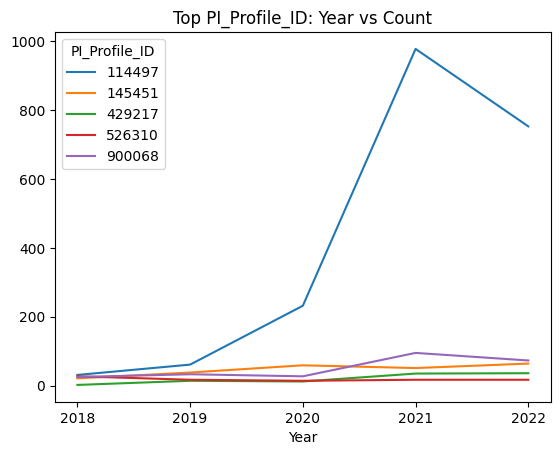

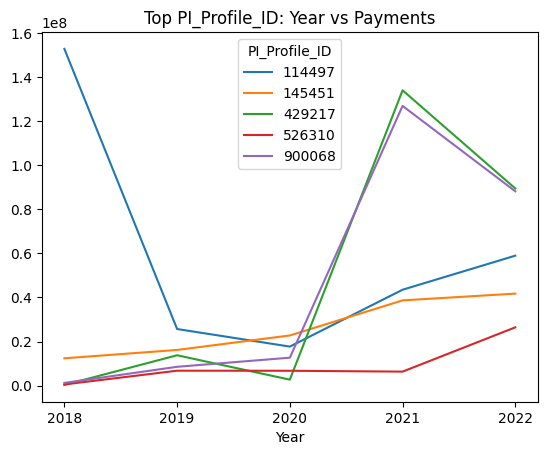

In [45]:
top_PI=top_reporting(op_full_df,5,total_d,PI_column_info,'PI_Profile_ID',True)

#### Specialities

Table below reporting on the year: 2022
Examining data based on: PI_Specialty_1
Total payments by the top 5:  3,716,023,227.81
Percent of total payments top 5 represents:  49.23


,Total_Amount_of_Payment_USDollars,record_counts,avg_payment,PI_Specialty_1
1,1166122736.02,74345,15685.00,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...
2,891539130.02,144377,6175.00,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...
3,694395784.07,172682,4021.00,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|FAMILY MED...
4,622028005.79,37307,16673.00,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|INTERNAL M...
5,341937571.91,21050,16244.00,ALLOPATHIC & OSTEOPATHIC PHYSICIANS|PSYCHIATRY...


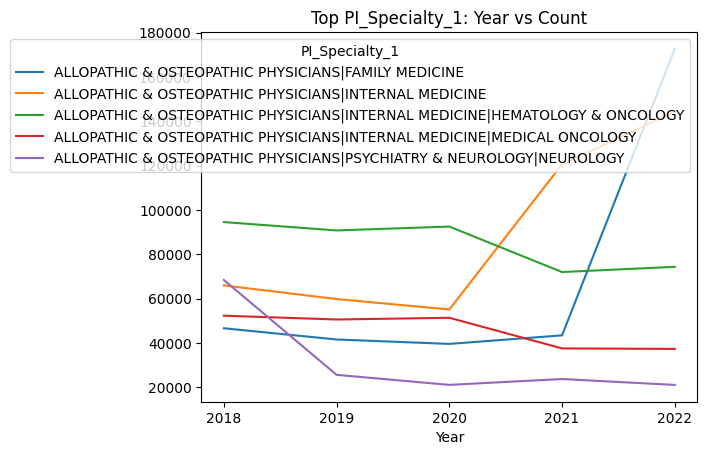

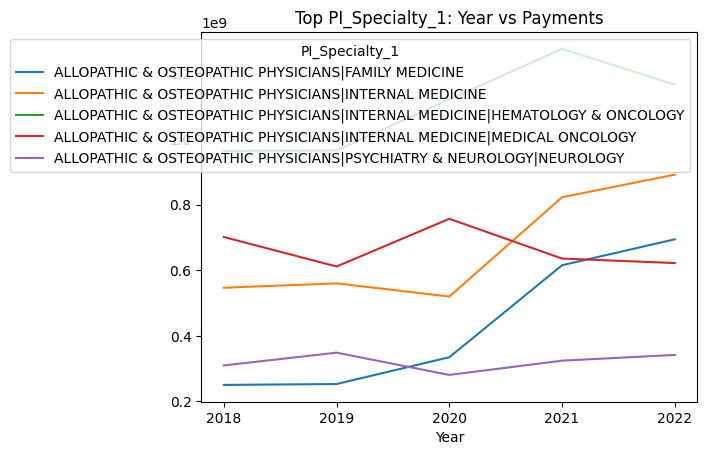

In [46]:
top_PI_speciality=top_reporting(op_full_df,5,total_d,PI_specialty_column_info,'PI_Specialty_1',True)

#### Teaching hospitals

Table below reporting on the year: 2022
Examining data based on: Teaching_Hospital_CCN
Total payments by the top 5:  529,362,974.16
Percent of total payments top 5 represents:  7.01


,Total_Amount_of_Payment_USDollars,record_counts,avg_payment,Teaching_Hospital_CCN,THL_Hospital Name,THL_City,THL_State,THL_Zip Code
1,283678758.87,5904,48049.00,450076,UT MD ANDERSON CANCER CENTER,HOUSTON,TX,77030
2,72052861.88,1089,66164.00,220110,BRIGHAM AND WOMENS HOSPITAL,BOSTON,MA,2115
3,61236461.50,2275,26917.00,54144,LANGLEY PORTER PSYCHIATRIC HOSPITAL,SAN FRANCISCO,CA,94143
4,57762745.43,3107,18591.00,390111,HOSPITAL OF THE UNIV OF PENNA,PHILADELPHIA,PA,19104
5,54632146.48,1185,46103.00,220162,DANA-FARBER CANCER INSTITUTE,BOSTON,MA,2215


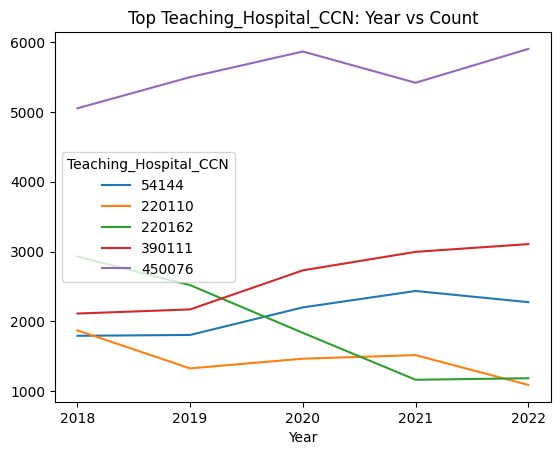

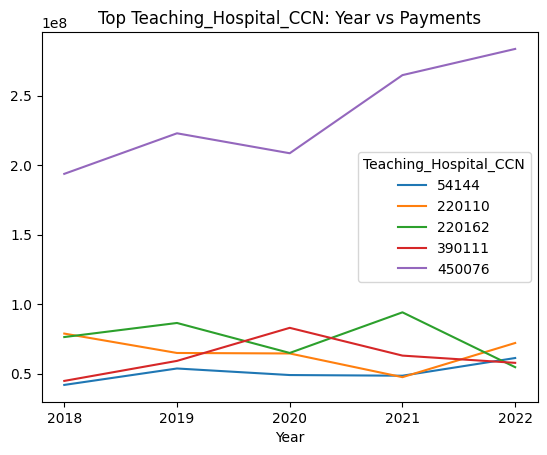

In [47]:
top_teaching_hospitals=top_reporting(op_full_df,5,total_d,Hospital_info,'Teaching_Hospital_CCN',True)

#### States

Table below reporting on the year: 2022
Examining data based on: PI_State
Total payments by the top 5:  3,535,232,630.89
Percent of total payments top 5 represents:  46.83


,Total_Amount_of_Payment_USDollars,record_counts,avg_payment,PI_State
1,901934681.82,128547,7016.00,TX
2,892787327.05,83337,10713.00,CA
3,823350808.41,124387,6619.00,FL
4,507899924.76,41478,12245.00,NY
5,409259888.85,15955,25651.00,MA


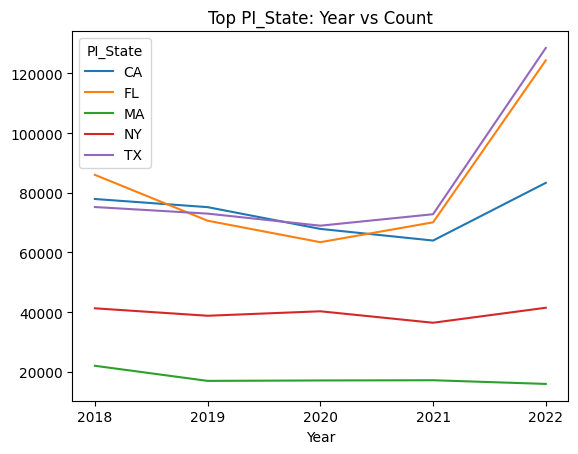

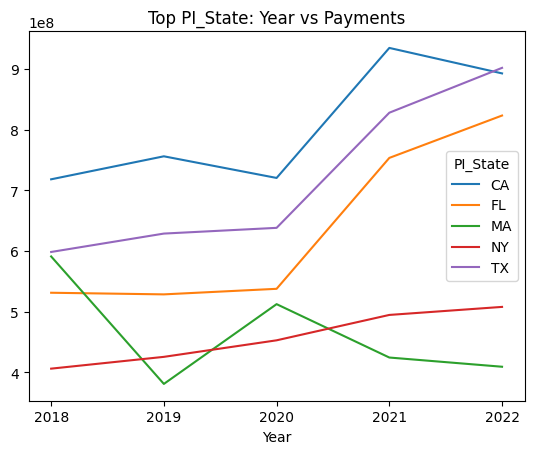

In [48]:
top_States=top_reporting(op_full_df,5,total_d,State_info,'PI_State',True)

#### Manufacturers

Table below reporting on the year: 2022
Examining data based on: AM_Name
Total payments by the top 5:  2,817,930,784.32
Percent of total payments top 5 represents:  37.33


,Total_Amount_of_Payment_USDollars,record_counts,avg_payment,AM_Payment_ID,AM_Name,AM_State,AM_Country
1,807329512.48,37138,21739.00,100000000286,PFIZER INC.,NY,UNITED STATES
2,705418098.45,279753,2522.00,100000961851,"MODERNATX, INC.",MA,UNITED STATES
3,475078765.00,9785,48552.00,100000000053,MERCK SHARP & DOHME LLC,NJ,UNITED STATES
4,472686613.00,10687,44230.00,100000000088,ELI LILLY AND COMPANY,IN,UNITED STATES
5,357417795.39,5126,69726.00,100000000146,ASTRAZENECA PHARMACEUTICALS LP,DE,UNITED STATES


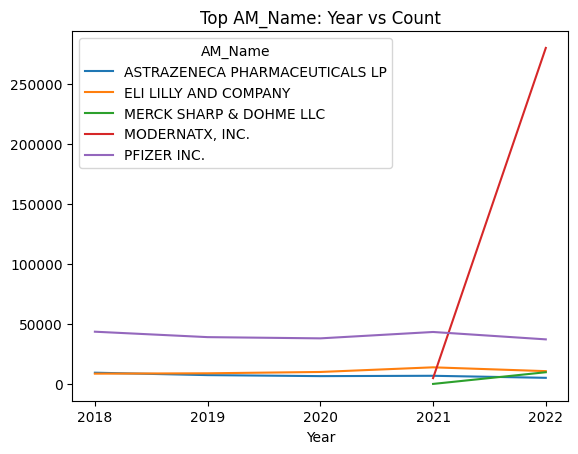

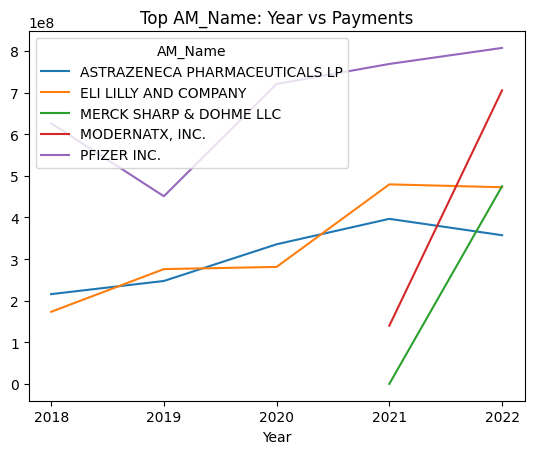

In [49]:
top_Manufacturer=top_reporting(op_full_df,5,total_d,Manufacturer_info,'AM_Name',True)

#### Drugs or devices

Table below reporting on the year: 2022
Examining data based on: Drug_or_Device_Name
Total payments by the top 5:  1,256,422,794.35
Percent of total payments top 5 represents:  16.64


,Total_Amount_of_Payment_USDollars,record_counts,avg_payment,Drug_or_Device_Name
1,392101108.91,130544,3004.00,MODERNA COVID-19 VACCINE
2,371923415.54,6626,56131.00,KEYTRUDA
3,213021057.33,2449,86983.00,IMBRUVICA
4,167920787.15,6518,25763.00,COMIRNATY
5,111456425.42,518,215167.00,CALQUENCE


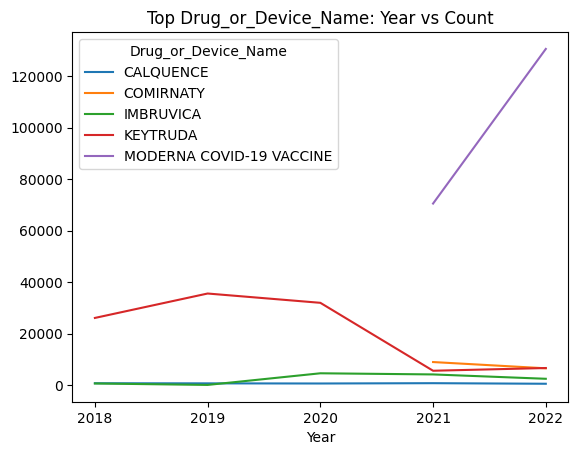

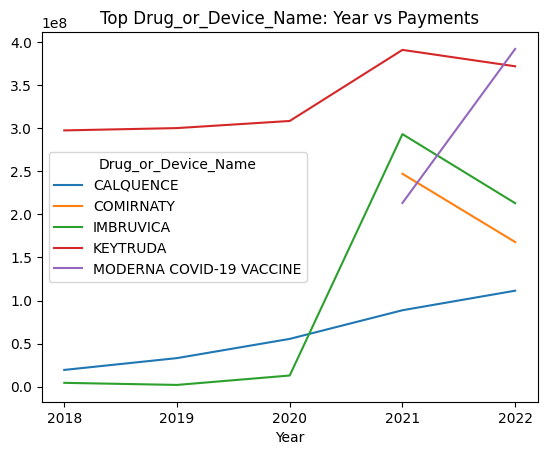

In [50]:
top_drug_or_devices=top_reporting(op_full_df,5,total_d,Drug_Medical_Device_info,'Drug_or_Device_Name',True)

#### Studies

Table below reporting on the year: 2022
Examining data based on: ClinicalTrials_Gov_Identifier
Total payments by the top 5:  315,443,305.2
Percent of total payments top 5 represents:  4.18


,Total_Amount_of_Payment_USDollars,record_counts,avg_payment,Name_of_Study,Record_ID,ClinicalTrials_Gov_Identifier
1,114681295.00,664,172713.00,"ASSESSMENT OF SAFETY, TOLERABILITY, AND EFFICA...",917810139,NCT04437511
2,69067228.00,492,140381.00,A STUDY OF DONANEMAB VERSUS PLACEBO IN PARTICI...,917807843,NCT05026866
3,50012546.40,16,3125784.00,EA9161: A RANDOMIZED PHASE III STUDY OF A TARG...,890236055,NCT03701282
4,46102422.40,20,2305121.00,A041702: A RANDOMIZED PHASE III STUDY OF IBRUT...,890238003,NCT03737981
5,35579813.40,18,1976656.00,E1912: A RANDOMIZED PHASE III STUDY OF PCI-327...,890235797,NCT02048813


Full text of the study names for top Clinical Trials:

Study: NCT04437511
Name of study: ASSESSMENT OF SAFETY, TOLERABILITY, AND EFFICACY OF DONANEMAB IN EARLY SYMPTOMATIC ALZHEIMERS DISEASE

Study: NCT05026866
Name of study: A STUDY OF DONANEMAB VERSUS PLACEBO IN PARTICIPANTS AT RISK FOR COGNITIVE AND FUNCTIONAL DECLINE OF ALZHEIMER'S DISEASE

Study: NCT03701282
Name of study: EA9161: A RANDOMIZED PHASE III STUDY OF A TARGETED THERAPY COMBINATION VERSUS IBRUTINIB AND OBINUTUZUMAB IN UNTREATED YOUNGER PATIENTS WITH CHRONIC LYMPHOCYTIC LEUKEMIA (CLL)

Study: NCT03737981
Name of study: A041702: A RANDOMIZED PHASE III STUDY OF IBRUTINIB PLUS OBINUTUZUMAB VERSUS IBRUTINIB PLUS VENETOCLAX AND OBINUTUZUMAB IN UNTREATED OLDER PATIENTS ( ? 70 YEARS OF AGE) WITH CHRONIC LYMPHOCYTIC LEUKEMIA (CLL)

Study: NCT02048813
Name of study: E1912: A RANDOMIZED PHASE III STUDY OF PCI-32765 BASED-THERAPY VERSUS STANDARD FLUDARABINE- CYCLOPHOSPHAMIDE- AND RITUXIMAB (FCR) CHEMOIMMUNOTHERAPY IN UNTREATED YOUN

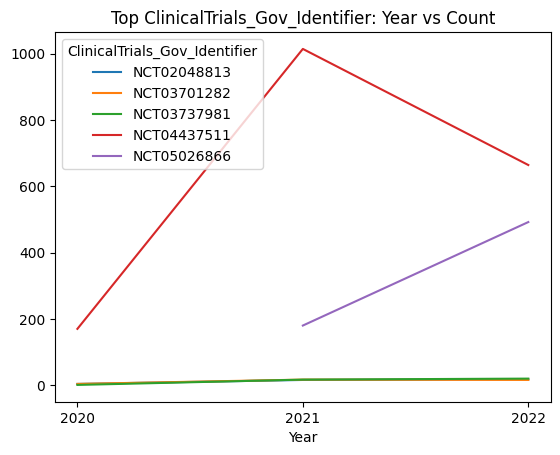

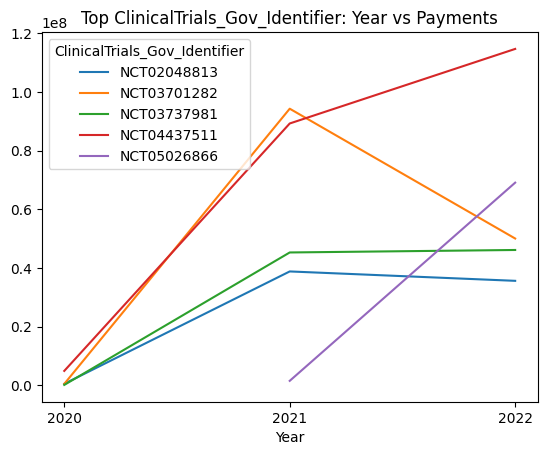

In [51]:
top_studies = top_reporting(op_full_df,5,total_d,Study_info,'ClinicalTrials_Gov_Identifier',True)

# State Information

In [52]:
# Merging the state data and the population data
population_df = pd.merge(state_abbr,population_data, left_on = "State", right_on= "NAME", how = "left")

In [53]:
# Changing the column names
population_df['Population Estimate 2022'] = population_df['POPESTIMATE2022']
population_df= population_df[['State','State Abbreviation','Population Estimate 2022']]
print("Example State & and population information:")
population_df.head()

Example State & and population information:


,State,State Abbreviation,Population Estimate 2022
0,Alabama,AL,5074296.00
1,Alaska,AK,733583.00
2,Arizona,AZ,7359197.00
3,Arkansas,AR,3045637.00
4,California,CA,39029342.00


In [54]:
def get_data_by_state(op_full_df, state_abbr,population_data):
    """
    This function will: 
     * Merge the latest year of op data with the state and population data and return a summary table
    Parameters:
        op_full_df: full op dataframe
        state_abbr: state abbrevaiton dataframe
        population_data: population dataframe

    Returns:
        state_df : A summary of information by state for the latest year
    """

    # Merging the state data and the population data

    population_df = pd.merge(state_abbr,population_data, left_on = "State", right_on= "NAME", how = "left")

    # Changing the column names
    population_df['Population Estimate 2022'] = population_df['POPESTIMATE2022']
    population_df= population_df[['State','State Abbreviation','Population Estimate 2022']]

    max_year = op_full_df.Year.max()
    latest_years_data = op_full_df[op_full_df.Year == max_year]

    state_df = latest_years_data.groupby("PI_State", as_index = False).agg({'Record_ID':'count',total_d:'sum'}).rename(columns={'Record_ID':'Record_count'})
    state_df =pd.merge(state_df,population_df, left_on = 'PI_State', right_on='State Abbreviation', how = 'left')
    state_df['Average_dollars_per_person'] = state_df[total_d]/state_df['Population Estimate 2022']

    pi_count_per_state_df = latest_years_data[["PI_State","PI_Profile_ID"]].drop_duplicates()
    pi_count_per_state_df = pi_count_per_state_df.groupby("PI_State", as_index = False).agg({'PI_Profile_ID':'count'})
    state_df['PI_Count']= pi_count_per_state_df['PI_Profile_ID']



    state_df = state_df[['PI_State','State','PI_Count','Population Estimate 2022','Record_count','Total_Amount_of_Payment_USDollars','Average_dollars_per_person']]
    #state_df = state_df.style.set_caption(f"State Open Payments Data for {max_year }")

    return state_df

In [55]:
state_df = get_data_by_state(op_full_df, state_abbr,population_data)
print("All States Alphabetical Order:")
state_df

All States Alphabetical Order:


,PI_State,State,PI_Count,Population Estimate 2022,Record_count,Total_Amount_of_Payment_USDollars,Average_dollars_per_person
0,AK,Alaska,15,733583.00,129,1300235.40,1.77
1,AL,Alabama,437,5074296.00,18463,86339755.03,17.02
2,AR,Arkansas,188,3045637.00,6811,36216622.22,11.89
3,AZ,Arizona,651,7359197.00,36516,150220633.05,20.41
4,CA,California,3006,39029342.00,83337,892787327.05,22.87
5,CO,Colorado,579,5839926.00,19782,133228617.08,22.81
6,CT,Connecticut,387,3626205.00,5137,66315715.87,18.29
7,DC,District of Columbia,229,671803.00,2923,37903778.73,56.42
8,DE,Delaware,58,1018396.00,705,3804454.83,3.74
9,FL,Florida,2613,22244823.00,124387,823350808.41,37.01


In [56]:
print("Top 5 States by Dollars")
state_df.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False).head(5)

Top 5 States by Dollars


,PI_State,State,PI_Count,Population Estimate 2022,Record_count,Total_Amount_of_Payment_USDollars,Average_dollars_per_person
43,TX,Texas,2425,30029572.00,128547,901934681.82,30.03
4,CA,California,3006,39029342.00,83337,892787327.05,22.87
9,FL,Florida,2613,22244823.00,124387,823350808.41,37.01
34,NY,New York,2147,19677151.00,41478,507899924.76,25.81
19,MA,Massachusetts,1229,6981974.00,15955,409259888.85,58.62


In [57]:
print("Top 5 States by Average Dollars per Person")
state_df.sort_values(by='Average_dollars_per_person', ascending=False).head(5)

Top 5 States by Average Dollars per Person


,PI_State,State,PI_Count,Population Estimate 2022,Record_count,Total_Amount_of_Payment_USDollars,Average_dollars_per_person
19,MA,Massachusetts,1229,6981974.00,15955,409259888.85,58.62
7,DC,District of Columbia,229,671803.00,2923,37903778.73,56.42
29,NE,Nebraska,220,1967923.00,14174,91354657.80,46.42
39,RI,Rhode Island,96,1093734.00,1890,43833054.51,40.08
9,FL,Florida,2613,22244823.00,124387,823350808.41,37.01


# Export tables to postgres (latest year only)

### Setting up data to be exported

In [58]:
final_columns_for_export = [
    'Record_ID',
    'PI_Profile_ID',
    'PI_NPI',
    'PI_First_Name',
    'PI_Middle_Name',
    'PI_Last_Name',
    'PI_City',
    'PI_State',
    'PI_Zip_Code',
    'THL_CCN',
    'THL_Hospital Name',
    'THL_City',
    'THL_State',
    'THL_Zip Code',
    'AM_Payment_ID',
    'AM_Name',
    'AM_State',
    'AM_Country',
    'Name_of_Study',
    'ClinicalTrials_Gov_Identifier',
    'Drug_or_Device_Name',
    'Total_Amount_of_Payment_USDollars',
    'Date_of_Payment',
    'Year'
]

final_columns_for_export_dictionary = {
    'Record_ID':'record_id', 
    'PI_Profile_ID':'pi_profile_id', 
    'PI_NPI':'pi_npi', 
    'PI_First_Name':'pi_first_name', 
    'PI_Middle_Name':'pi_middle_name', 
    'PI_Last_Name':'pi_last_name', 
    'PI_City':'pi_city', 
    'PI_State':'pi_state', 
    'PI_Zip_Code':'pi_zip_code', 
    'THL_CCN':'thl_ccn', 
    'THL_Hospital Name':'thl_hospital_name', 
    'THL_City':'thl_city', 
    'THL_State':'thl_state', 
    'THL_Zip Code':'thl_zip_code', 
    'AM_Payment_ID':'am_payment_id', 
    'AM_Name':'am_name', 
    'AM_State':'am_state', 
    'AM_Country':'am_country', 
    'Name_of_Study':'name_of_study', 
    'ClinicalTrials_Gov_Identifier':'clinicaltrials_gov_identifier', 
    'Drug_or_Device_Name':'drug_or_device_name', 
    'Total_Amount_of_Payment_USDollars':'total_amount_of_payment_usdollars', 
    'Date_of_Payment':'date_of_payment', 
    'Year':'year'
}

max_year = op_full_df.Year.max()
op_for_export = op_full_df[op_full_df.Year == max_year]

op_for_export = op_for_export[final_columns_for_export].rename(columns=final_columns_for_export_dictionary)
op_for_export=op_for_export.convert_dtypes()

print("Example row of op data to be exported:")
op_for_export.head(1)

Example row of op data to be exported:


,record_id,pi_profile_id,pi_npi,pi_first_name,pi_middle_name,pi_last_name,pi_city,pi_state,pi_zip_code,thl_ccn,thl_hospital_name,thl_city,thl_state,thl_zip_code,am_payment_id,am_name,am_state,am_country,name_of_study,clinicaltrials_gov_identifier,drug_or_device_name,total_amount_of_payment_usdollars,date_of_payment,year
0,953473211,860254,1467538132,NEETA,<NA>,SOMAIAH,HOUSTON,TX,77030-4000,450076,UT MD ANDERSON CANCER CENTER,HOUSTON,TX,77030,100000776815,DECIPHERA PHARMACEUTICALS INC.,MA,UNITED STATES,INTRIGUE A STUDY OF DCC-2618 VS SUNITINIB IN A...,NCT03673501,QINLOCK,1850.00,2022-03-05,2022


In [59]:
print("Examples of each column (These may not be in the same Row)")

for c in op_for_export.columns:
    try:
        print(f" {c} : {op_for_export[c].max()}")
    except:
        print('None')

Examples of each column (These may not be in the same Row)
 record_id : 964285889
 pi_profile_id : 11434874
 pi_npi : 1992997977
 pi_first_name : ZVONIMIR
 pi_middle_name : _
 pi_last_name : ZYNDA
 pi_city : ZIONSVILLE
 pi_state : WY
 pi_zip_code : 99645
 thl_ccn : 530014
 thl_hospital_name : YUMA REGIONAL MEDICAL CENTER
 thl_city : YUMA
 thl_state : WY
 thl_zip_code : 99519
 am_payment_id : 100001181906
 am_name : ZOLL SERVICES LLC (A/K/A ZOLL LIFECOR CORP)
 am_state : WV
 am_country : UNITED STATES
 name_of_study : \";PHASE II RANDOMISED, DOUBLE BLIND, MULTICENTRE STUDY TO ASSESS THE EFFICACY OF AZD2281 IN THE TREATMENT OF PATIENTS WITH PLATINUM SENSITIVE SEROUS OVARIAN CANCER FOLLOWING TREATMENT WITH TWO OR MORE PLATINUM CONTAINING REGIMENS\";
 clinicaltrials_gov_identifier : SRA20211105
 drug_or_device_name : ZYTIGA
 total_amount_of_payment_usdollars : 21298847.3
 date_of_payment : 2022-12-31
 year : 2022


In [60]:
population_export = population_df[['State Abbreviation','State','Population Estimate 2022']]
population_export = population_export.rename(columns = {'State Abbreviation':'state_abbreviation','State':'state','Population Estimate 2022':'est_population_2022'})
print("Example of population data to be exported:")
population_export.head(1)

Example of population data to be exported:


,state_abbreviation,state,est_population_2022
0,AL,Alabama,5074296.00


### Setting up sql strings

In [61]:
db_pw = os.environ.get('MY_DB_PW')

In [62]:
# Drop table strings.

op_table_drop = "DROP TABLE IF EXISTS op CASCADE"
population_table_drop = "DROP TABLE IF EXISTS us_population CASCADE"

drop_tables = [op_table_drop, population_table_drop]

In [63]:
# Dataframes to write

data_frames_to_write = [op_for_export, population_export]

In [64]:
# Create table strings

op_table_create = "CREATE TABLE IF NOT EXISTS op \
(record_id bigint, \
pi_profile_id int, \
pi_npi bigint, \
pi_first_name varchar, \
pi_middle_name varchar, \
pi_last_name varchar, \
pi_city varchar, \
pi_state varchar, \
pi_zip_code varchar, \
thl_ccn bigint, \
thl_hospital_name varchar, \
thl_city varchar, \
thl_state varchar, \
thl_zip_code varchar, \
am_payment_id bigint, \
am_name varchar, \
am_state varchar, \
am_country varchar, \
name_of_study varchar, \
clinicaltrials_gov_identifier varchar, \
drug_or_device_name varchar, \
total_amount_of_payment_usdollars float, \
date_of_payment date, \
year int, \
PRIMARY KEY(record_id));"


us_population_table_create = "CREATE TABLE IF NOT EXISTS us_population \
(state_abbreviation varchar NOT NULL, \
state varchar NOT NULL, \
est_population float NOT NULL,\
PRIMARY KEY(state_abbreviation));"

create_tables = [op_table_create, us_population_table_create]

In [65]:
# INSERT RECORDS

op_table_insert = "INSERT INTO op \
(record_id, \
pi_profile_id, \
pi_npi, \
pi_first_name, \
pi_middle_name, \
pi_last_name, \
pi_city, \
pi_state, \
pi_zip_code, \
thl_ccn, \
thl_hospital_name, \
thl_city, \
thl_state, \
thl_zip_code, \
am_payment_id, \
am_name, \
am_state, \
am_country, \
name_of_study, \
clinicaltrials_gov_identifier, \
drug_or_device_name, \
total_amount_of_payment_usdollars, \
date_of_payment, \
year) \
values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"

us_population_table_insert = "INSERT INTO us_population \
(state_abbreviation, \
state, \
est_population) \
values (%s,%s,%s)"

In [66]:
# Final type change
op_for_export = op_for_export.astype(object).where(pd.notnull(op_for_export), None)

### Starting Database Writes

In [67]:
conn = psycopg2.connect(
    host="localhost",
    database="op_project",
    user="postgres",
    password=db_pw)

In [68]:
conn

<connection object at 0x22f545150; dsn: 'user=postgres password=xxx dbname=op_project host=localhost', closed: 0>

In [69]:
cur = conn.cursor()

In [70]:
for x in range(0,len(drop_tables)):
    cur.execute(drop_tables[x])
    cur.execute(create_tables[x])
  
    

In [71]:
cur.close()
# commit the changes
conn.commit()

In [72]:
conn = psycopg2.connect(
    host="localhost",
    database="op_project",
    user="postgres",
    password=db_pw)

In [73]:
cur = conn.cursor()

In [74]:
for i, row in population_export.iterrows():
    cur.execute(us_population_table_insert, list(row))

In [75]:
cur.close()
# commit the changes
conn.commit()

In [76]:
conn = psycopg2.connect(
    host="localhost",
    database="op_project",
    user="postgres",
    password=db_pw)

In [77]:
cur = conn.cursor()

In [78]:
for i, row in op_for_export.iterrows():
    cur.execute(op_table_insert, list(row))

In [79]:
cur.close()
# commit the changes
conn.commit()

### Finished updating database

# Below is Scratch

Things to change
* Add column for updated date to postgres export
* Add in the QA views and report on the views
* Move the graph legends outside of the graphs
* Create readme